In [1]:
from KitaevHoneycomb import run_atomic, save_data

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
Jx = 1.0
Jy = 1.0
Jz = 1.0

S = 1.0

Lx = 2
Ly = 4
shift = 0
bc = 'periodic'
bc_MPS = 'infinite'

chi_list = [int(2**i) for i in range(2, 9)]

result_dict = {}

In [7]:
chi_list = [int(2**i) for i in range(2, 11)]

In [8]:
initial_psi = None
for chi in chi_list:
    param = (Jx, Jy, Jz, Lx, Ly, chi)
    if param in result_dict:
        result = result_dict[param]
    else:
        result = run_atomic(
            Jx=Jx, Jy=Jy, Jz=Jz,
            Lx=Lx, Ly=Ly, 
            S=S,
            shift=shift,
            chi=chi,
            bc=bc, bc_MPS=bc_MPS,
            initial_psi=initial_psi,
        )
    initial_psi = result['psi'].copy()
    result_dict[param] = result

Reading 'Lx'=2 for config KitaevHoneycombModel
Reading 'Ly'=4 for config KitaevHoneycombModel
Reading 'conserve'='parity' for config KitaevHoneycombModel
Reading 'S'=1.0 for config KitaevHoneycombModel
Reading 'order'='Cstyle' for config KitaevHoneycombModel
Reading 'bc'='periodic' for config KitaevHoneycombModel
Reading 'shift'=0 for config KitaevHoneycombModel
Reading 'bc_MPS'='infinite' for config KitaevHoneycombModel
Reading 'Jx'=1.0 for config KitaevHoneycombModel
Reading 'Jy'=1.0 for config KitaevHoneycombModel
Reading 'Jz'=1.0 for config KitaevHoneycombModel


==============================START==============================
Chi =  512 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment


/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -0.6401133650166546, S = nan, norm_err = 2.1e-06
Current memory usage 782.9 MB, time elapsed: 790.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4924e-05, max_E_trunc = 5.0301e-05
MPS bond dimensions: [512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]
Updating environment
.....
sweep 20, age = 1296
Energy = -0.6401137494566491, S = nan, norm_err = 2.0e-07
Current memory usage 782.9 MB, time elapsed: 1118.4 s
Delta E = -3.8444e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4640e-05, max_E_trunc = 4.9520e-

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -0.6400875545036975, S = nan, norm_err = 2.2e-06
Current memory usage 2624.6 MB, time elapsed: 4692.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4805e-06, max_E_trunc = 8.5601e-06
MPS bond dimensions: [1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]
Updating environment
.....
sweep 20, age = 1296
Energy = -0.6401413726991976, S = nan, norm_err = 9.1e-08
Current memory usage 2624.6 MB, time elapsed: 6794.0 s
Delta E = -5.3818e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.4014e-06, max

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


In [9]:
for key, element in result_dict.items():
#     Jx, Jy, Jz, chi = key
    psi = element['psi']
    print(psi.correlation_length())

2.70183595385866
2.1206040326889926
2.4034627364208627
3.2606305864847034
4.6860632932379875
7.244590060174479
10.806348139717414
14.52775472232833
17.925858676965426


In [14]:
# some api for the file operation
import h5py
from tenpy.tools import hdf5_io
import os.path

# functools
from functools import wraps

# path
from pathlib import Path

def save_data(
    result, 
    S,
    Lx, 
    Ly, 
    chi,
    Jx, 
    Jy, 
    Jz, 
    prefix='data/', 
):
    file_name = full_path(chi, Jx, Jy, Jz, L, prefix=prefix, suffix='.h5')
    with h5py.File(file_name, 'w') as f:
        hdf5_io.save_to_hdf5(f, result)

In [8]:
from tenpy.networks.site import SpinSite

In [9]:
site = SpinSite(S=1.5)

In [10]:
site.state_labels

{'-1.5': 0, '-0.5': 1, '0.5': 2, '1.5': 3, 'down': 0, 'up': 3}

In [17]:
3**12

531441

In [18]:
Jx = 1.0
Jy = 1.0
Jz = 1.0

S = 1.5

Lx = 2
Ly = 4
shift = 0
bc = 'periodic'
bc_MPS = 'infinite'

chi_list = [int(2**i) for i in np.arange(2, 9, 0.5)]

result_dict = {}

initial_psi = None
for chi in chi_list:
    param = (Jx, Jy, Jz, Lx, Ly, chi)
    result = run_atomic(
        Jx=Jx, Jy=Jy, Jz=Jz,
        Lx=Lx, Ly=Ly, 
        S=S,
        shift=shift,
        chi=chi,
        bc=bc, bc_MPS=bc_MPS,
        initial_psi=initial_psi,
    )
    initial_psi = result['psi'].copy()
    result_dict[param] = result


Reading 'Lx'=2 for config KitaevHoneycombModel
Reading 'Ly'=4 for config KitaevHoneycombModel
Reading 'conserve'='parity' for config KitaevHoneycombModel
Reading 'S'=1.5 for config KitaevHoneycombModel
Reading 'order'='Cstyle' for config KitaevHoneycombModel
Reading 'bc'='periodic' for config KitaevHoneycombModel
Reading 'bc_MPS'='infinite' for config KitaevHoneycombModel
Reading 'Jx'=1.0 for config KitaevHoneycombModel
Reading 'Jy'=1.0 for config KitaevHoneycombModel
Reading 'Jz'=1.0 for config KitaevHoneycombModel


==============================START==============================
Chi =  4 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


.........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.2362683458304451, S = nan, norm_err = 1.3e-05
Current memory usage 675.7 MB, time elapsed: 6.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8701e-03, max_E_trunc = 2.8746e-02
MPS bond dimensions: [4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 4, 4]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.2362688851752530, S = nan, norm_err = 2.0e-06
Current memory usage 675.7 MB, time elapsed: 13.4 s
Delta E = -5.3934e-08, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.8509e-03, max_E_trunc = 2.8741e-02
MPS bond dimensions: [4, 4, 4, 4, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['P_tol'] for config lanczos_params

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.2508656464152956, S = nan, norm_err = 1.3e-05
Current memory usage 675.7 MB, time elapsed: 20.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9557e-03, max_E_trunc = 7.3272e-03
MPS bond dimensions: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.2508738247962157, S = nan, norm_err = 2.1e-06
Current memory usage 675.7 MB, time elapsed: 28.4 s
Delta E = -8.1784e-07, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.9158e-03, max_E_trunc = 7.2772e-03
MPS bond dimensions: [5, 5, 5, 5

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))




==============================START==============================
Chi =  8 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.2829822388690921, S = nan, norm_err = 1.1e-05
Current memory usage 675.7 MB, time elapsed: 23.0 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 8.0677e-03, max_E_trunc = 2.7946e-02
MPS bond dimensions: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
Updating environment
.....
sweep 20, ag

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))



Reading 'Jy'=1.0 for config KitaevHoneycombModel
Reading 'Jz'=1.0 for config KitaevHoneycombModel


==============================START==============================
Chi =  11 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.2902971133005749, S = nan, norm_err = 1.3e-05
Current memory usage 675.7 MB, time elapsed: 25.1 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0492e-03, max_E_trunc = 6.7538e-03
MPS bond 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Reading 'order'='Cstyle' for config KitaevHoneycombModel
Reading 'bc'='periodic' for config KitaevHoneycombModel
Reading 'bc_MPS'='infinite' for config KitaevHoneycombModel
Reading 'Jx'=1.0 for config KitaevHoneycombModel
Reading 'Jy'=1.0 for config KitaevHoneycombModel
Reading 'Jz'=1.0 for config KitaevHoneycombModel


==============================START==============================
Chi =  16 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))




==============================START==============================
Chi =  22 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3174587311162185, S = nan, norm_err = 8.8e-06
Current memory usage 675.7 MB, time elapsed: 33.7 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.1419e-03, max_E_trunc = 5.4696e-03
MPS bond dimensions: [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))




==============================START==============================
Chi =  32 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3226447362726717, S = nan, norm_err = 1.0e-05
Current memory usage 675.7 MB, time elapsed: 36.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 9.7864e-04, max_E_trunc = 4.4215e-03
MPS bond dimensions: [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Updating environment
.

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


Reading 'order'='Cstyle' for config KitaevHoneycombModel
Reading 'bc'='periodic' for config KitaevHoneycombModel
Reading 'bc_MPS'='infinite' for config KitaevHoneycombModel
Reading 'Jx'=1.0 for config KitaevHoneycombModel
Reading 'Jy'=1.0 for config KitaevHoneycombModel
Reading 'Jz'=1.0 for config KitaevHoneycombModel


==============================START==============================
Chi =  45 

Subconfig 'trunc_params'=Config(<6 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3325232634072179, S = nan, norm_err = 9.3e-06
Current memory usage 675.7 MB, time elapsed: 47.3 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.5203e-04, max_E_trunc = 2.5776e-03
MPS bond dimensions: [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.3325385116995747, S = nan, norm_err = 1.3e-06
Current memory usage 675.7 MB, time elapsed: 64.2 s
Delta E = -1.5248e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.4081e-04, max_E_trunc = 2.5306e-03
MPS bond dimensi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3342603268911404, S = nan, norm_err = 6.4e-06
Current memory usage 675.7 MB, time elapsed: 65.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.7337e-04, max_E_trunc = 2.2313e-03
MPS bond dimensions: [90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.3343165091954532, S = nan, norm_err = 9.8e-07
Current memory usage 675.7 MB, time elapsed: 88.3 s
Delta E = -5.6182e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 4.4988e-04, max_E_trunc = 2.1409e-03
MPS bond dimensi

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3340084889375348, S = nan, norm_err = 4.4e-06
Current memory usage 675.7 MB, time elapsed: 96.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.1178e-04, max_E_trunc = 1.3974e-03
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.3353294686126773, S = nan, norm_err = 5.8e-07
Current memory usage 675.7 MB, time elapsed: 134.1 s
Delta E = -1.3210e-04, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.8959e-04, max_E_trunc = 1.3110e-03

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3345801324892079, S = nan, norm_err = 5.8e-06
Current memory usage 675.7 MB, time elapsed: 162.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0889e-04, max_E_trunc = 9.5465e-04
MPS bond dimensions: [181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.3360220841168342, S = nan, norm_err = 6.5e-07
Current memory usage 675.7 MB, time elapsed: 227.6 s
Delta E = -1.4420e-04, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.0471e-04, max_E_trunc = 9.3596e-0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3364282736622499, S = nan, norm_err = 4.0e-06
Current memory usage 675.7 MB, time elapsed: 326.4 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4118e-04, max_E_trunc = 6.6904e-04
MPS bond dimensions: [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.3364659374094288, S = nan, norm_err = 6.4e-07
Current memory usage 675.7 MB, time elapsed: 456.3 s
Delta E = -3.7664e-06, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.4093e-04, max_E_trunc = 6.6976e-0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 816
Energy = -1.3338751336590420, S = nan, norm_err = 3.8e-06
Current memory usage 846.0 MB, time elapsed: 657.8 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0769e-04, max_E_trunc = 4.9799e-04
MPS bond dimensions: [362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362, 362]
Updating environment
.....
sweep 20, age = 1296
Energy = -1.3367606148174005, S = nan, norm_err = 5.4e-07
Current memory usage 846.0 MB, time elapsed: 957.6 s
Delta E = -2.8855e-04, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 1.0370e-04, max_E_trunc = 4.8490e-0

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/tools/params.py:225: UserWarning: unused option ['dtype'] for config KitaevHoneycombModel

  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


In [11]:
S_list = []
xi_list = []
for key, result in result_dict.items():
    psi = result['psi']
    S_list.append(np.max(psi.entanglement_entropy()))
    xi_list.append(psi.correlation_length())


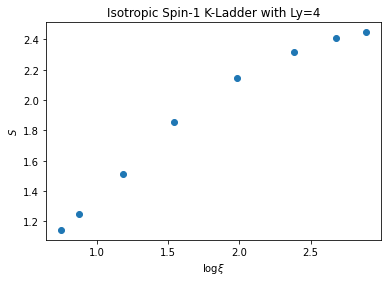

In [17]:
plt.plot(np.log(xi_list)[1:], S_list[1:], 'o')
plt.xlabel(r'$\log \xi$')
plt.ylabel(r'$S$')
plt.title(f'Isotropic Spin-{int(S)} K-Ladder with Ly={Ly}')
plt.show()

In [10]:
len(result_dict)

9